## $\mathbb{R}$ 上の写像における不動点の安定性に関する証明

<div style="border-radius: 0.5rem; border:solid 0.01rem; background-color: rgba(255, 100, 100 , 0.2); padding:1rem 1rem 0rem 1rem" >
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

**定理**: (1 次元の離散力学系における不動点の安定性) [[1](#footnote1)]

</div>
<div style="border-bottom: solid 0.01rem; margin:0 0 0.5rem 0">

$f$ を $\mathbb{R}$ 上の写像とするとき，
$f(p) = p$ なる不動点において $|f'(p)| < 1$ ならその $p$ は沈点， $|f'(p)| > 1$ なら源点である．

</div>

<div>

中間値の定理より，以下の条件を満たす $c$ が $x (\neq p) $ と $p$ の間に存在する．

$$
\frac{f(x) - f(p)}{x - p} = f'(c)
$$

$|f'(c)| < K$ なる $K$ を用いれば以下が成立する．

$$
|f(x) - f(p)| < K|x - p|
$$

さらに， $x$ に $f(x)$ を代入すれば

$$
|f^2(x) - f(p)| < K|f(x) - p| < K^2|x - p|
$$

よって

$$
|f^n(x) - f(p)| < K^n|x - p|
$$

が成り立ち，$n\rightarrow\infty$ としたとき $f^{n}(x)$ が，不動点 $p$ に吸い込まれる条件は $K < 1$ であり，これは $|f'(c)| < 1$
を満たせばよく，連続性から $|f'(p)| < 1$ を満たせば良い．

吸い込まれない場合は $K > 1$ の場合であり，$|f'(p)| > 1$ を満たせば良いことがわかる．

</div>

</div>


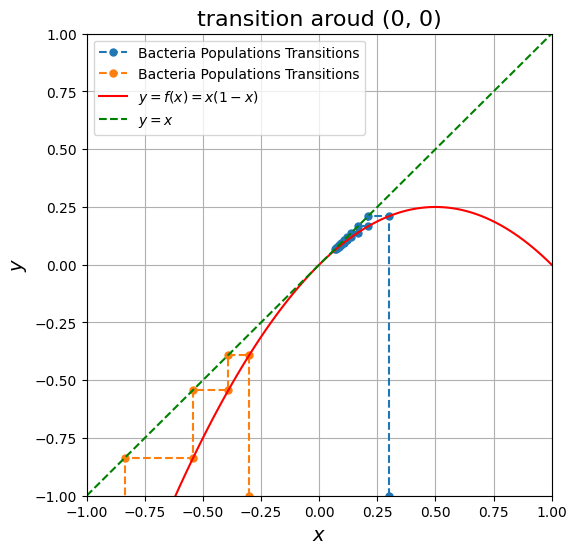

In [3]:
import numpy as np
import matplotlib.pyplot as plt


def logistic_model_gen(a: float):
    def logistic_model(x: float | np.ndarray):
        return a * x * (1 - x)

    return logistic_model


f = logistic_model_gen(1.0)


# 蜘蛛の巣図法シミュレーション用の初期値
web_x_init: float = 0.3
web_y_init: float = -1.0

# シミュレーションのステップ数
steps = 10

# 蜘蛛の巣図法シミュレーションのプロット用
# x 軸成分
web_x: list[float] = [web_x_init]
# y 軸成分
web_y: list[float] = [web_y_init]

# シミュレーション
for step in range(steps):
    x_current: float = web_x[-1]
    y_current: float = f(x_current)
    web_x.extend([x_current, y_current])
    web_y.extend([y_current, y_current])


# グラフのプロット
plt.figure(figsize=(6, 6))
plt.plot(
    web_x,
    web_y,
    linestyle="dashed",
    marker="o",
    markersize=5,
    label="Bacteria Populations Transitions",
)

# 蜘蛛の巣図法シミュレーション用の初期値
web_x_init: float = -0.3
web_y_init: float = -1.0

# シミュレーションのステップ数
steps = 100

# 蜘蛛の巣図法シミュレーションのプロット用
# x 軸成分
web_x: list[float] = [web_x_init]
# y 軸成分
web_y: list[float] = [web_y_init]

# シミュレーション
for step in range(steps):
    x_current: float = web_x[-1]
    y_current: float = f(x_current)
    web_x.extend([x_current, y_current])
    web_y.extend([y_current, y_current])

plt.plot(
    web_x,
    web_y,
    linestyle="dashed",
    marker="o",
    markersize=5,
    label="Bacteria Populations Transitions",
)

# f(x) = 2x(1-x) のグラフ
x: np.ndarray = np.linspace(-1.0, 1, 100)
y_logistic: np.ndarray = f(x)

# y = x の直線
y_identity = x

plt.plot(x, y_logistic, label="$y = f(x) = x(1-x)$", color="red")
plt.plot(x, y_identity, label="$y=x$", linestyle="--", color="green")
plt.xlabel("$x$", fontsize=14)
plt.ylabel("$y$", fontsize=14)
plt.title("transition aroud (0, 0)", fontsize=16)
# x軸とy軸の範囲を設定
plt.xlim(-1.0, 1.0)
plt.ylim(-1.0, 1.0)
plt.grid(True)
plt.legend()
plt.show()

上のシミュレーションでは $x = 0$ が不動点となっているが， $f'(0) = 1$ であり，
沈点にも源点にも見られない挙動を示す．

$0.0$ より小さい値から始めると $0.0$ から離れていくのに対し， $0.0$ より大きい値から始めると
$0.0$ へと吸い込まれることがわかる．


<a name="footnote1">1</a>: Morris W. Hirsch, Stephen Smale, Robert L. Devaney 著, 桐木紳ほか訳 『力学系入門 : 微分方程式からカオスまで』, 共立出版, 東京, Japan, 2017.1, ISBN: 9784320111363 [4320111362].
